In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target
Y_name = iris.target_names

## 1. k-means clustering

In [4]:
# Make Kmeans model
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, verbose=1)

# Fit the data
kmeans.fit(X)

# Get cluster indices
idx = kmeans.predict(X)

# Get distances to each centroids (cluster centers)
dist = kmeans.transform(X)

# Get centroid vectors
centers = kmeans.cluster_centers_

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 91.78526195426195
start iteration
done sorting
end inner loop
Iteration 1, inertia 86.02653143374039
start iteration
done sorting
end inner loop
Iteration 2, inertia 84.38785971685972
start iteration
done sorting
end inner loop
Iteration 3, inertia 83.5161095494006
start iteration
done sorting
end inner loop
Iteration 4, inertia 82.28201449275363
start iteration
done sorting
end inner loop
Iteration 5, inertia 81.2778
start iteration
done sorting
end inner loop
Iteration 6, inertia 80.226346215781
start iteration
done sorting
end inner loop
Iteration 7, inertia 79.59232190942473
start iteration
done sorting
end inner loop
Iteration 8, inertia 79.02616666666667
start iteration
done sorting
end inner loop
Iteration 9, inertia 78.8556658259773
start iteration
done sorting
end inner loop
Iteration 10, inertia 78.8556658259773
center shift 0.000000e+00 within tolerance 1.135618e-04
Initialization comple

In [5]:
# Cluster indices
idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [6]:
# Distances to each centroids (cluster centers)
dist

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

In [7]:
# Centroid vectors
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 2. Evaluate the result

### 참고: Clustering metrics in `scikit-learn`
- https://scikit-learn.org/stable/modules/classes.html#clustering-metrics

The `sklearn.metrics.cluster` submodule contains evaluation metrics for cluster analysis results. There are two forms of evaluation:

1. supervised, which uses a ground truth class values for each sample.
2. unsupervised, which does not and measures the ‘quality’ of the model itself.

우리는 iris dataset에 클래스가 3개라는 것을 알고 있습니다. 이에 **k=3** 외에 다른 **k**를 시도해보고, 결과를 평가해봅시다. 

In [9]:
k_set = [2, 3, 4, 5]
names = []
models = []
results = []

for k in k_set:
    names.append('KMeans_with_k=%d' % k)
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=1234)
    model.fit(X)
    models.append(model)
    results.append(model.predict(X))

In [12]:
models

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=1234, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=1234, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=1234, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
     random_state=1234, tol=0.0001, verbose=0)]

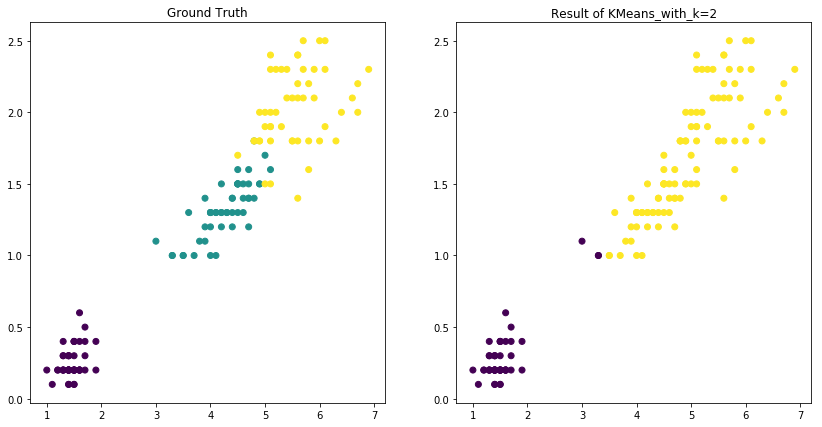

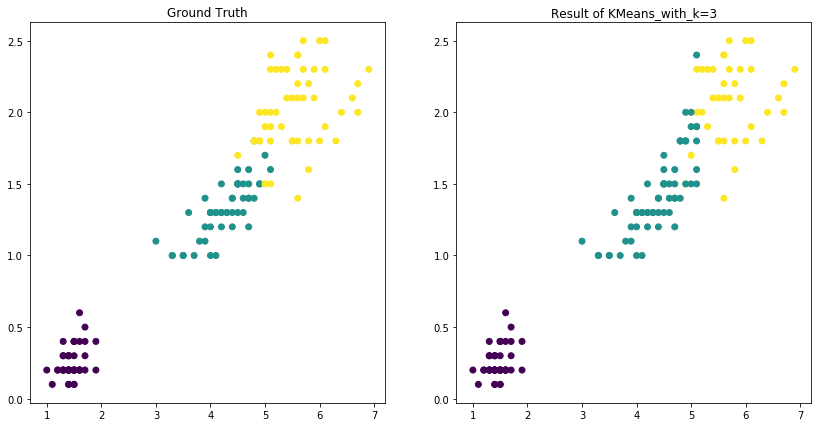

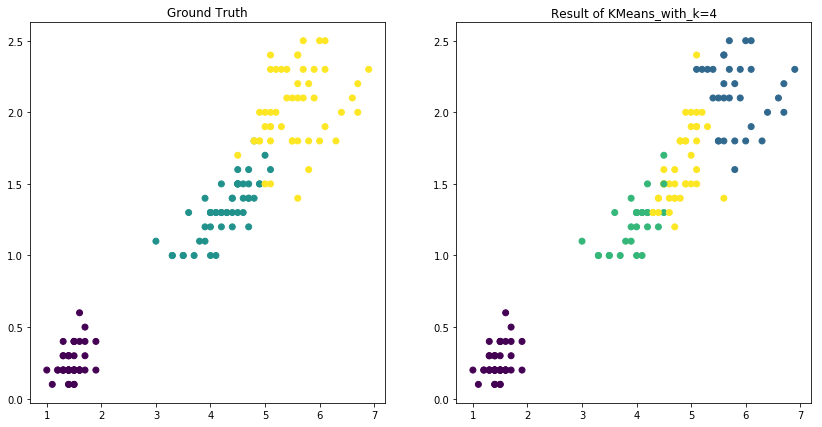

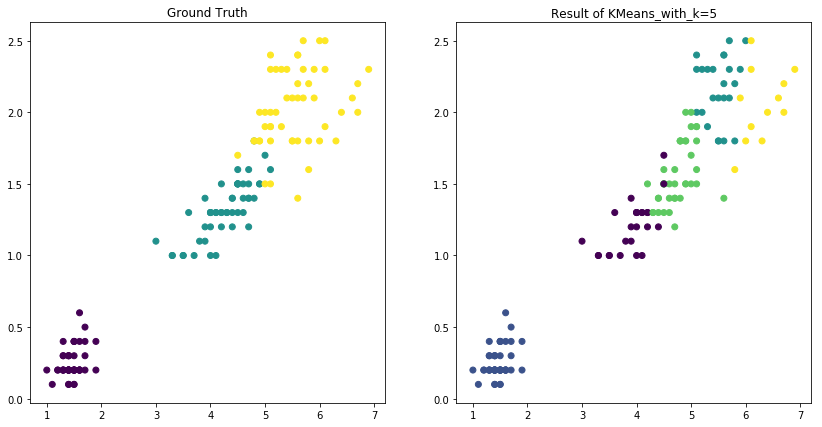

In [13]:
for k, name, result in zip(k_set, names, results):
    plt.figure(figsize=(14, 7))
    
    plt.subplot(1, 2, 1)
    # Scatter plot between 'Petal Length' and 'Petal Width'
    plt.scatter(X[:, 2], X[:, 3], c=Y)
    plt.title('Ground Truth')
    
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 2], X[:, 3], c=result)
    plt.title('Result of %s' % name)
    
    plt.show()

### 1) Accuracy(?)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [15]:
for name, result in zip(names, results):
    cm = confusion_matrix(Y, result)
    accuracy = accuracy_score(Y, result)
    print('** %s **' % name)
    print('accuracy: %.4f' % accuracy)
    print(cm)
    print()

** KMeans_with_k=2 **
accuracy: 0.6467
[[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]

** KMeans_with_k=3 **
accuracy: 0.8933
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

** KMeans_with_k=4 **
accuracy: 0.3400
[[50  0  0  0]
 [ 0  0 26 24]
 [ 0 32  1 17]
 [ 0  0  0  0]]

** KMeans_with_k=5 **
accuracy: 0.1600
[[ 0 50  0  0  0]
 [24  0  0 26  0]
 [ 1  0 24 13 12]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]



### 2) Mutual information

In [16]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score

In [17]:
for name, result in zip(names, results):
    mi = mutual_info_score(Y, result)
    ami = adjusted_mutual_info_score(Y, result)
    print('** %s **' % name)
    print('mutual information score: %.4f' % mi)
    print('adjusted mutual information score: %.4f' % ami)
    print()

** KMeans_with_k=2 **
mutual information score: 0.5738
adjusted mutual information score: 0.5194

** KMeans_with_k=3 **
mutual information score: 0.8256
adjusted mutual information score: 0.7484

** KMeans_with_k=4 **
mutual information score: 0.8846
adjusted mutual information score: 0.6456

** KMeans_with_k=5 **
mutual information score: 0.9051
adjusted mutual information score: 0.5918



C:\Users\JunHyuk\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### 3) V-measure
V-measure는 homogeneity와 completeness로 계산이 됨.

In [18]:
from sklearn.metrics import homogeneity_completeness_v_measure

In [19]:
for name, result in zip(names, results):
    hm, cp, v_measure = homogeneity_completeness_v_measure(Y, result)
    print('** %s **' % name)
    print('homogeneity score: %.4f' % hm)
    print('completeness score: %.4f' % cp)
    print('v-measure: %.4f' % v_measure)
    print()

** KMeans_with_k=2 **
homogeneity score: 0.5223
completeness score: 0.8835
v-measure: 0.6565

** KMeans_with_k=3 **
homogeneity score: 0.7515
completeness score: 0.7650
v-measure: 0.7582

** KMeans_with_k=4 **
homogeneity score: 0.8052
completeness score: 0.6510
v-measure: 0.7199

** KMeans_with_k=5 **
homogeneity score: 0.8239
completeness score: 0.5993
v-measure: 0.6939



### 4) Silhouette measure

`scikit-plot`이라는 패키지를 설치합시다.
- 참고: https://github.com/reiinakano/scikit-plot

In [20]:
!pip install scikit-plot

In [21]:
import scikitplot as skplt
from sklearn.metrics import silhouette_score

KMeans_with_k=2: silhouette score = 0.6810
KMeans_with_k=3: silhouette score = 0.5528
KMeans_with_k=4: silhouette score = 0.4975
KMeans_with_k=5: silhouette score = 0.4887


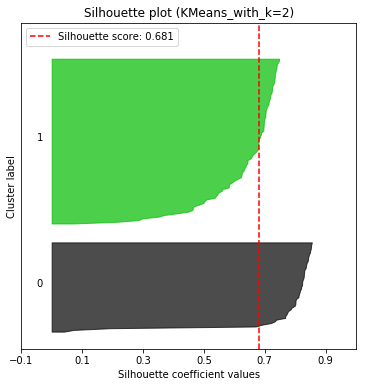

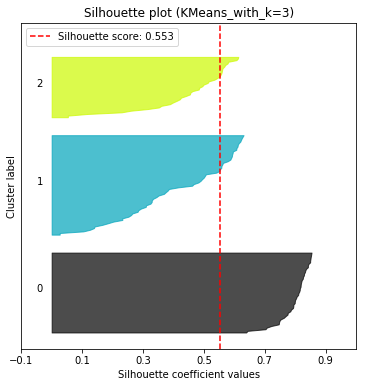

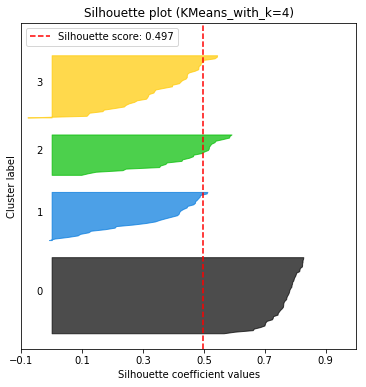

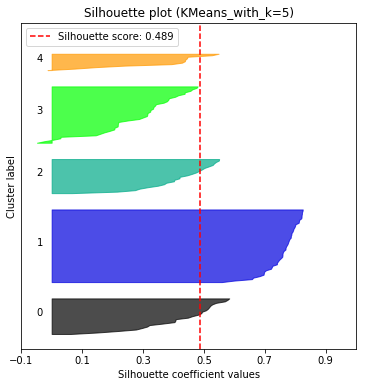

In [22]:
# Silhouette score
for name, result in zip(names, results):
    sil_score = silhouette_score(X, result)
    print('%s: silhouette score = %.4f' % (name, sil_score))
    
    # Silhouette plot
    # https://github.com/reiinakano/scikit-plot/blob/master/scikitplot/metrics.py
    skplt.metrics.plot_silhouette(X, result,
                                  title='Silhouette plot (%s)' % name,
                                  cmap='nipy_spectral',
                                  figsize=(6, 6))

### 5) Inertia
- Sum of squared distance for each sample to its closest centroid

In [ ]:
for name, model in zip(names, models):
    inertia = model.inertia_
    print('%s: inertia = %.4f' % (name, inertia))